## 2 Exploratory Data Analysis

## 2.1 Load the Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
c_data = pd.read_csv('../Data/c_data_cleaned.csv')

In [3]:
c_data.head(5)

,ID,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expenses,Children,Age,Relationship Status
0,5524,Undergraduate,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,3,11,1,1617,0,64,Single
1,2174,Undergraduate,46344.0,08-03-2014,38,11,1,6,2,1,...,0,0,0,3,11,0,27,2,67,Single
2,4141,Undergraduate,71613.0,21-08-2013,26,426,49,127,111,21,...,0,0,0,3,11,0,776,0,56,Couple
3,6182,Undergraduate,26646.0,10-02-2014,26,11,4,20,10,3,...,0,0,0,3,11,0,53,1,37,Couple
4,5324,PhD,58293.0,19-01-2014,94,173,43,118,46,27,...,0,0,0,3,11,0,422,1,40,Couple


## 2.2 Dropping Uncessary Columns

In [4]:
c_data.columns

Index(['ID', 'Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_Expenses', 'Children', 'Age', 'Relationship Status'],
      dtype='object')

In [5]:
#'Z_CostContact', 'Z_Revenue' is same for all rows. Also, 'ID' doesn't provide any additional information about our data
c_data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [6]:
c_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2236.0,51961.906544,21411.404811,1730.0,35502.5,51684.0,68275.75,162397.0
Recency,2236.0,49.116279,28.957284,0.0,24.0,49.0,74.00,99.0
MntWines,2236.0,304.127460,336.591810,0.0,24.0,174.0,504.25,1493.0
MntFruits,2236.0,26.275939,39.724007,0.0,1.0,8.0,33.00,199.0
MntMeatProducts,2236.0,166.983453,225.689645,0.0,16.0,67.0,232.00,1725.0
MntFishProducts,2236.0,37.536225,54.648562,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2236.0,27.080501,41.299504,0.0,1.0,8.0,33.00,263.0
MntGoldProds,2236.0,43.983005,52.061568,0.0,9.0,24.0,56.00,362.0
NumDealsPurchases,2236.0,2.326029,1.933032,0.0,1.0,2.0,3.00,15.0
NumWebPurchases,2236.0,4.087657,2.779988,0.0,2.0,4.0,6.00,27.0


## 2.3 Analyzing Variables

### 2.3.1 Education

<Figure size 504x504 with 0 Axes>

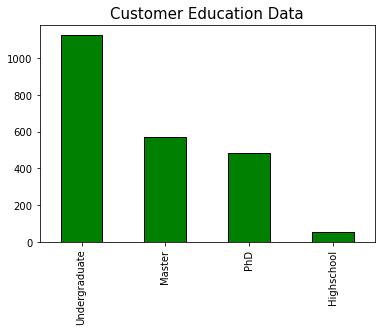

<Figure size 504x504 with 0 Axes>

In [21]:
c_data['Education'].value_counts().plot(kind='bar',color = 'green',edgecolor='black')
plt.title("Customer Education Data",fontsize=15)
plt.figure(figsize=(7,7))

In [9]:
c_data["Education"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Undergraduate    50.4%
Master           25.5%
PhD              21.7%
Highschool        2.4%
Name: Education, dtype: object

More than half of the customers only have undergraduate degree  

### 2.3.2 Income

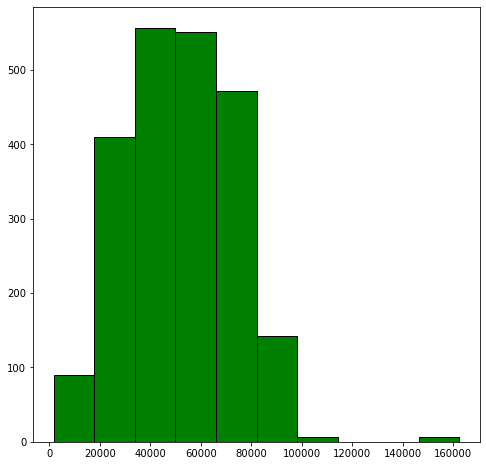

In [26]:
plt.figure(figsize=(8,8))
plt.hist(c_data["Income"],color = 'green',edgecolor='black')
plt.show()

In [23]:
c_data["Income"].describe()

count      2236.000000
mean      51961.906544
std       21411.404811
min        1730.000000
25%       35502.500000
50%       51684.000000
75%       68275.750000
max      162397.000000
Name: Income, dtype: float64

### 2.3.3 Total_Expenses 

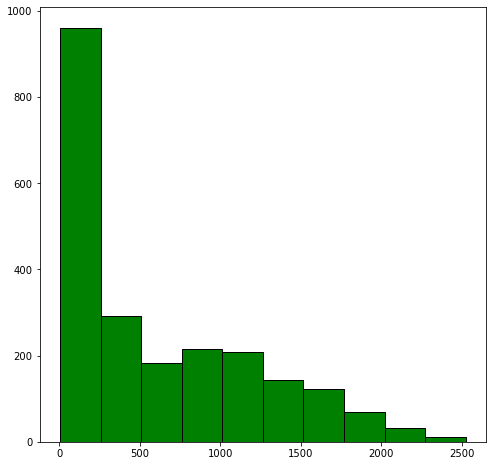

In [35]:
plt.figure(figsize=(8,8))
plt.hist(c_data["Total_Expenses"],color = 'green',edgecolor='black')
plt.show()

In [37]:
c_data["Total_Expenses"].describe()

count    2236.000000
mean      605.986583
std       601.865156
min         5.000000
25%        69.000000
50%       396.500000
75%      1045.500000
max      2525.000000
Name: Total_Expenses, dtype: float64

### 2.3.3 Total_Accepted_Cmp

## 2.4 Data Wrangling

In [ ]:
c_data['Education'].value_counts()

In [ ]:
#Changing Education data with numerical values
# c_data['Education'] = c_data['Education'].str.replace('Highschool', '0')
# c_data['Education'] = c_data['Education'].str.replace('Undergraduate', '1')
# c_data['Education'] = c_data['Education'].str.replace('Master', '2')
# c_data['Education'] = c_data['Education'].str.replace('PhD', '3')

In [ ]:
c_data['Relationship Status'].value_counts()

In [ ]:
#Changing Relationship Status with numerical values
# c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('Single', '0')
# c_data['Relationship Status'] = c_data['Relationship Status'].str.replace('Couple', '1')

In [ ]:
# c_data['Education'] = pd.to_numeric(c_data['Education'],errors = 'coerce')
# c_data['Relationship Status'] = pd.to_numeric(c_data['Relationship Status'],errors = 'coerce')

In [ ]:
c_data.info()

## 2.5 Exploring the Data

## 2.5.1 Visualizing High Dimensional Data

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### Scale the data

In [ ]:
#Dropping promotion data
promotion = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response']

#Dropping product purchase data because we already combined them under 'Total_Expenses'
product_pur = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

#Dropping 'Dt_Customer' because it is object data type
dt_cust = ['Dt_Customer']

drop_col = promotion + product_pur + dt_cust

new_data = c_data.drop(drop_col, axis=1)

In [ ]:
new_data.columns

In [ ]:
#Saving the columns
new_data_columns = new_data.columns

In [ ]:
new_data.head()

In [ ]:
new_data = scale(new_data)
scaled_new_data = pd.DataFrame(new_data, columns= new_data_columns)
scaled_new_data.head()

#### Calculate the PCA transformation

In [ ]:
new_data_pca = PCA().fit(scaled_new_data)

In [ ]:
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

In [ ]:
plt.subplots(figsize=(10, 6))
plt.plot(new_data_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for customer summary statistics');

First 3 Compenents explain over 60 percent variance in our data. Therefore, using these features would be helpful to get useful insights

In [ ]:
new_data_pca_x = new_data_pca.transform(scaled_new_data)

In [ ]:
new_data_pca_x.shape

In [ ]:
c_corr = c_data.corr()
plt.figure(figsize=(15,15))  
sns.heatmap(c_corr, annot=True)